# 1. Table of Contents

1. [Table of Contents](#1.-Table-of-Contents)
2. [Import Library](#2.-Import-Library)
3. [Load the Dataset](#3.-Load-the-Dataset)
4. [Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
    1. [Exploratory Data Analysis on Orders Dataframe](#4.1.-Exploratory-Data-Analysis-on-Orders-Dataframe)
    2. [Exploratory Data Analysis on Customers Dataframe](#4.2.-Exploratory-Data-Analysis-on-Customers-Dataframe)
    3. [Exploratory Data Analysis on OrderItems Dataframe](#4.3.-Exploratory-Data-Analysis-on-OrderItems-Dataframe)
    4. [Exploratory Data Analysis on Products DataFrame](#4.4.-Exploratory-Data-Analysis-on-Products-DataFrame)
5. [Create a Grouped-by Dataframe for Individual Customers for Further RFM Analysis](#5.-Create-a-Grouped-by-Dataframe-for-Individual-Customers-for-Further-RFM-Analysis)
6. [RFM Analysis](#6.-RFM-Analysis)
    1. [Create DataFrame for RFM Analysis](#6.1.-Create-DataFrame-for-RFM-Analysis)
    2. [RFM Analysis](#6.2.-RFM-Analysis)
    3. [Customer Segmentation Using RFM](#6.3.-Customer-Segmentation-Using-RFM)
7. [Churn Prediction](#7.-Churn-Prediction)
    1. [Naive Bayes](#7.1.-Naive-Bayes)
    2. [Decision Tree](#7.2.-Decision-Tree)
    3. [Random Forest](#7.3.-Random-Forest)
    4. [XGB)ost](#7.4.-XGBoost)ame](#product

# 2. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

import seaborn as sns
from scipy import stats
import scipy.stats as stats  # Renamed to avoid conflict with previous import

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Displays all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# 3. Load the Dataset


In [3]:
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
orderItems = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
orderReviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
productCategoryTranslation = pd.read_csv("product_category_name_translation.csv")

# 4. Exploratory Data Analysis

## 4.1. Exploratory Data Analysis on Orders Dataframe

In [4]:
# Output the first 10 rows
orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [5]:
# Discover data shape
print("Number of Record: " + str((orders.shape[0])))
print("Number of Columns: " + str((orders.shape[1])))

Number of Record: 99441
Number of Columns: 8


In [6]:
# Data type
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [7]:
# Convert data to the appropriate type
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)

In [8]:
# Counting missing value
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [9]:
# Find the number of unique order_id 
orders['order_id'].nunique()


99441

### Drop inconsistant data

### Drop unused data
For the purpose of building a prediction model, only keep the order with 'delivered' status

In [10]:
otherThanDelivered = orders[orders.order_status != 'delivered'].index
orders.drop(index = otherThanDelivered, inplace = True)

### Fill in the null value

In [11]:
orders.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [12]:
# For easy analysis of the available data, create new columns
orders['purchased_approved'] = (orders.order_approved_at - orders.order_purchase_timestamp).dt.seconds
orders['approved_carrier'] = (orders.order_delivered_carrier_date - orders.order_approved_at).dt.days
orders['carrier_delivered'] = (orders.order_delivered_customer_date - orders.order_delivered_carrier_date).dt.days
orders['delivered_estimated'] = (orders.order_estimated_delivery_date - orders.order_delivered_customer_date).dt.days
orders['purchased_delivered'] = (orders.order_delivered_customer_date - orders.order_purchase_timestamp).dt.days
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,642.0,2.0,6.0,7.0,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,24170.0,0.0,12.0,5.0,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,994.0,0.0,9.0,17.0,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1073.0,3.0,9.0,12.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3710.0,0.0,1.0,9.0,2.0


In [13]:
# Store the index of null values
approvedAtNull = orders[orders.order_approved_at.isna()].index
deliveredCarrierNull = orders[orders.order_delivered_carrier_date.isna()].index
deliveredCustomerNull = orders[orders.order_delivered_customer_date.isna()].index

# Asign the median value to null value
orders.loc[approvedAtNull, 'order_approved_at'] = orders.loc[approvedAtNull, 'order_purchase_timestamp'] + pd.Timedelta(seconds = orders.purchased_approved.median())
orders.loc[deliveredCarrierNull, 'order_delivered_carrier_date'] = orders.loc[deliveredCarrierNull, 'order_approved_at'] + pd.Timedelta(days = orders.approved_carrier.median())
orders.loc[deliveredCustomerNull, 'order_delivered_customer_date'] = orders.loc[deliveredCustomerNull, 'order_delivered_carrier_date'] + pd.Timedelta(days = orders.carrier_delivered.median())

#### New columns are created using the available datetime columns 
- `Purchased_approved` represents the **seconds taken for an order to get approved** after the customer purchases it.
- `approved_carrier` represents the **days taken for the order to go to the delivery carrier** after it being approved.
- `carrier_delivered` represents the days **taken for the order to be delivered to the customer** from the date it reaches the delivery carrier.
- `delivered_estimated` represents the **date difference between the estimated delivery date and the actual delivery date**. 
- `purchased_delivered` represents the **days taken for the order to be delivered to the customer** from the date the customer made the purchase. 

In [14]:
# Drop data with carrier_delivered and approved_carrier < 0
falsifiedData = orders[orders.carrier_delivered < 0].index
orders.drop(index=falsifiedData, inplace=True)

falsifiedData = orders[orders.approved_carrier < 0].index
orders.drop(index=falsifiedData, inplace=True)

### Distribution of purchase approve

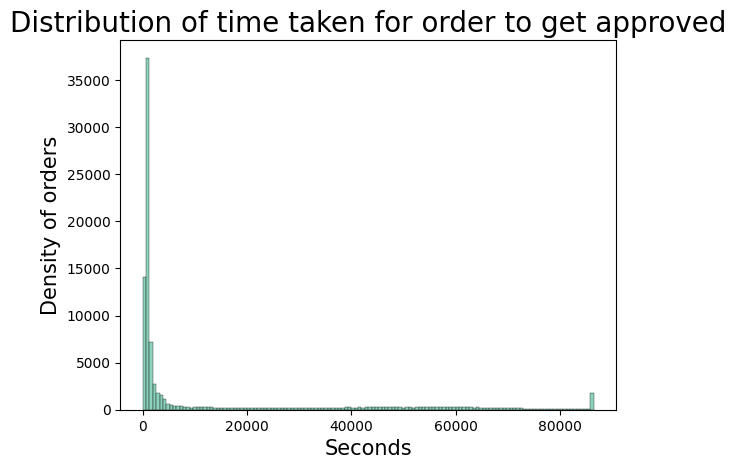

In [15]:
sns.set_palette("Set2")
sns.histplot(x='purchased_approved', data=orders)
plt.title('Distribution of time taken for order to get approved',fontsize=20)
plt.xlabel('Seconds',fontsize=15)
plt.ylabel('Density of orders',fontsize=15)
plt.show()

### Treating outliers using IQR 

In [16]:
Q1 = np.quantile(orders.purchased_approved, 0.25)
Q3 = np.quantile(orders.purchased_approved, 0.75)
IQR = Q3 - Q1

# Use 1.5*IQR to filter potential outlier 
purchasedApprovedDist = orders[~((orders.purchased_approved < Q1 - 1.5 * IQR) | (orders.purchased_approved > Q3 + 1.5 * IQR))]
purchasedApprovedDist.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,642.0,2.0,6.0,7.0,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,24170.0,0.0,12.0,5.0,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,994.0,0.0,9.0,17.0,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1073.0,3.0,9.0,12.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3710.0,0.0,1.0,9.0,2.0


### Visualize Order data

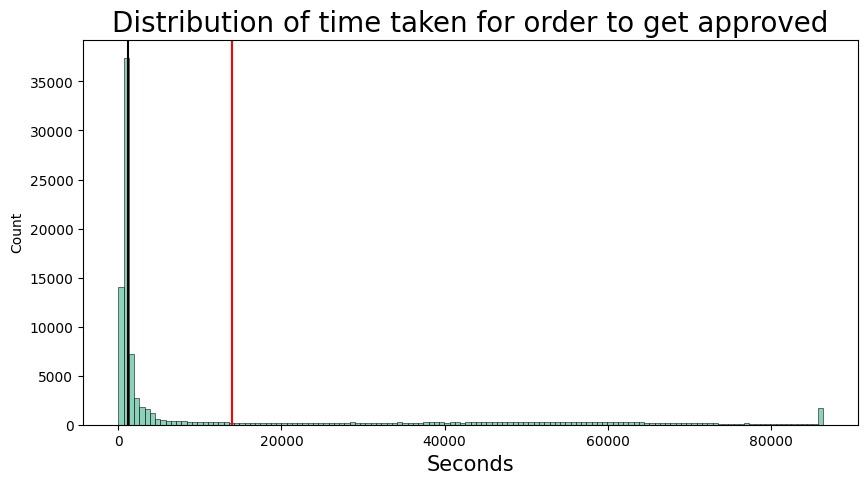

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(purchasedApprovedDist.purchased_approved)
plt.axvline(purchasedApprovedDist.purchased_approved.mean(), c = 'red')
plt.axvline(purchasedApprovedDist.purchased_approved.median(), c = 'black')
plt.xlabel('Seconds',color='black',fontsize=15)
plt.title('Distribution of time taken for order to get approved',color='black',fontsize=20)
plt.show()

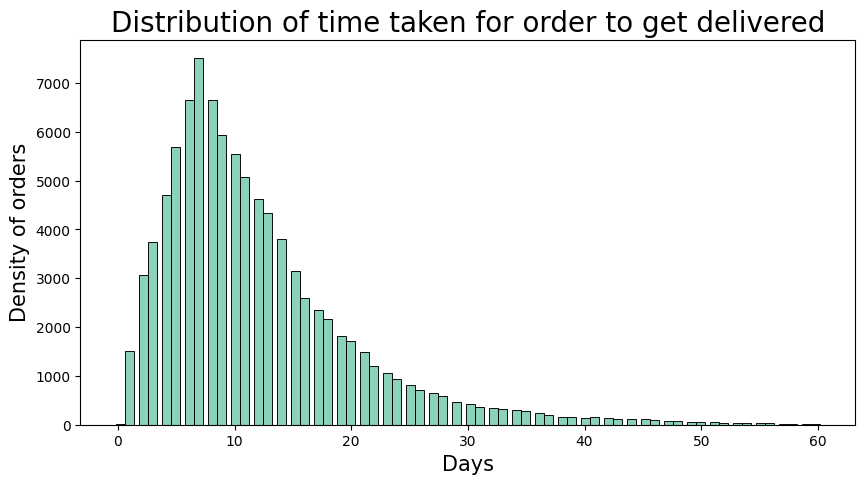

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(x='purchased_delivered', data=orders, binrange = (0, 60), shrink=2)
plt.title('Distribution of time taken for order to get delivered',fontsize=20)
plt.xlabel('Days',fontsize=15)
plt.ylabel('Density of orders',fontsize=15)
plt.show()

### Treating outliers using IQR 

In [19]:
# Using IQR method to remove outliers
Q1 = np.quantile(orders.purchased_delivered, 0.25)
Q3 = np.quantile(orders.purchased_delivered, 0.75)
IQR = Q3 - Q1
purchasedDeliveredDist = orders[~((orders.purchased_delivered < Q1 - 1.5 * IQR) | (orders.purchased_delivered > Q3 + 1.5 * IQR))]
purchasedDeliveredDist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,642.0,2.0,6.0,7.0,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,24170.0,0.0,12.0,5.0,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,994.0,0.0,9.0,17.0,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1073.0,3.0,9.0,12.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3710.0,0.0,1.0,9.0,2.0


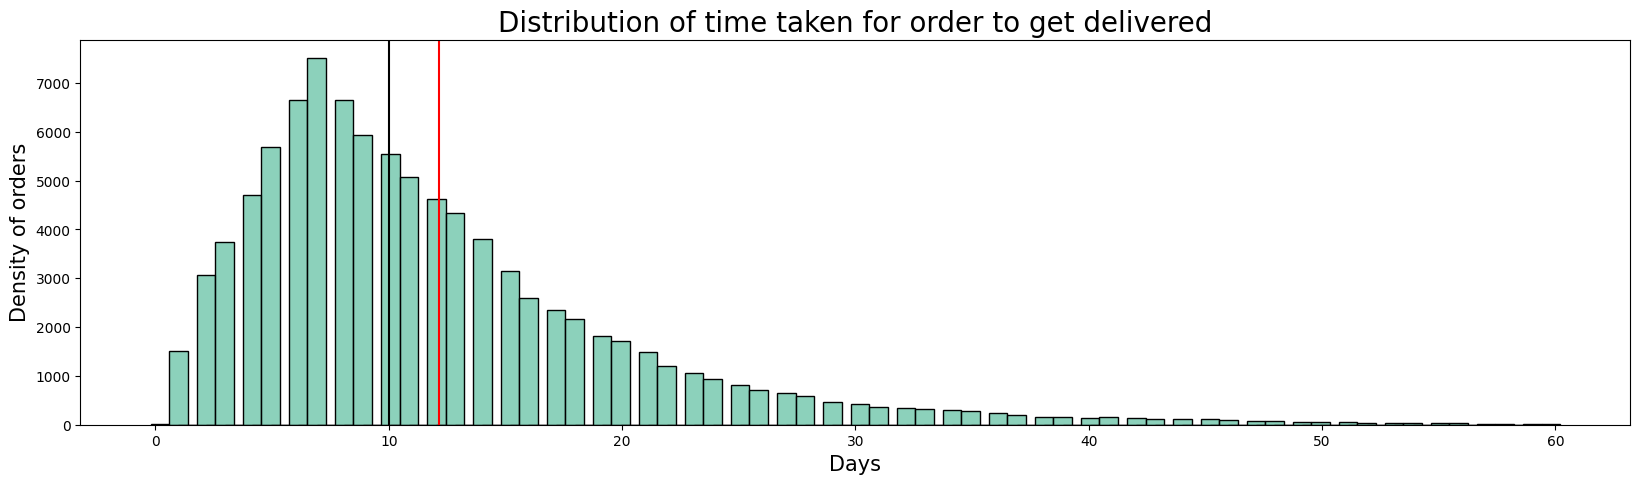

In [20]:
plt.figure(figsize=(20,5))
sns.histplot(purchasedDeliveredDist.purchased_delivered, binrange = (0, 60), shrink=2)
plt.axvline(purchasedDeliveredDist.purchased_delivered.mean(), c = 'red')
plt.axvline(purchasedDeliveredDist.purchased_delivered.median(), c = 'black')
plt.xlabel('Days',color='black',fontsize=15)
plt.ylabel('Density of orders',fontsize=15)
plt.title('Distribution of time taken for order to get delivered',color='black',fontsize=20)
plt.show()

## 4.2. Exploratory Data Analysis on Customers Dataframe

In [21]:
# Output the first 10 rows
customers.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [22]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [23]:
# Discover data shape
print("Number of Record: " + str((customers.shape[0])))
print("Number of Columns: " + str((customers.shape[1])))

Number of Record: 99441
Number of Columns: 5


In [24]:
# Finding missing value
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [25]:
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype(object)

In [26]:
customers.describe()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


### Observation: 
There is total 99441 customer_unique_id while only 96906 unique values of that. We can assume that **most customers only visit one time.** 

# 4.3. Exploratory Data Analysis on OrderItems Dataframe 

In [27]:
# Output the first 10 rows
orderItems.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [28]:
orderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [29]:
orderItems['shipping_limit_date'] = pd.to_datetime(orderItems.shipping_limit_date)

In [30]:
orderItems.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [31]:
orderItems.describe(exclude = np.number)

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN
freq,21,527,2033,NaN
mean,NaN,NaN,NaN,2018-01-07 15:36:52.192685312
min,NaN,NaN,NaN,2016-09-19 00:15:34
25%,NaN,NaN,NaN,2017-09-20 20:57:27.500000
50%,NaN,NaN,NaN,2018-01-26 13:59:35
75%,NaN,NaN,NaN,2018-05-10 14:34:00.750000128
max,NaN,NaN,NaN,2020-04-09 22:35:08


### Visualize orderItems data

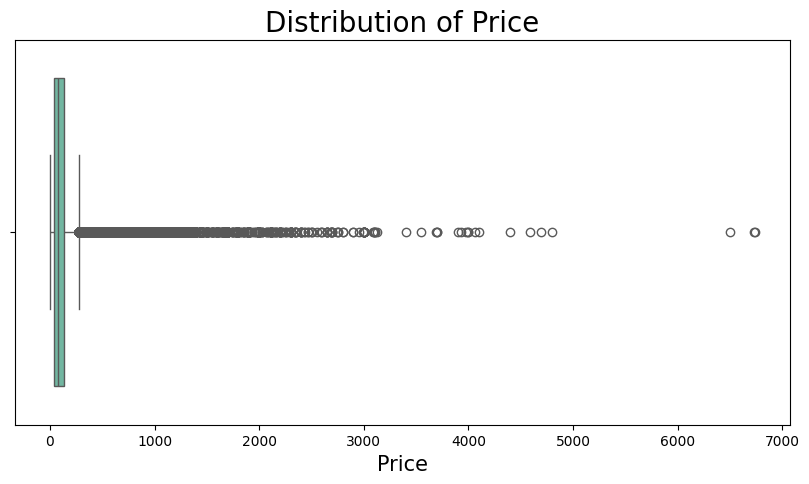

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='price', data=orderItems)
plt.xlabel('Price',color='black',fontsize=15)
plt.title('Distribution of Price',color='black',fontsize=20)
plt.show()

In [33]:
# Using IQR method to remove outliers
Q1 = np.quantile(orderItems.price, 0.25)
Q3 = np.quantile(orderItems.price, 0.75)
IQR = Q3 - Q1
priceDistribution = orderItems[~((orderItems.price < Q1 - 1.5 * IQR) | (orderItems.price > Q3 + 1.5 * IQR))]
priceDistribution.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


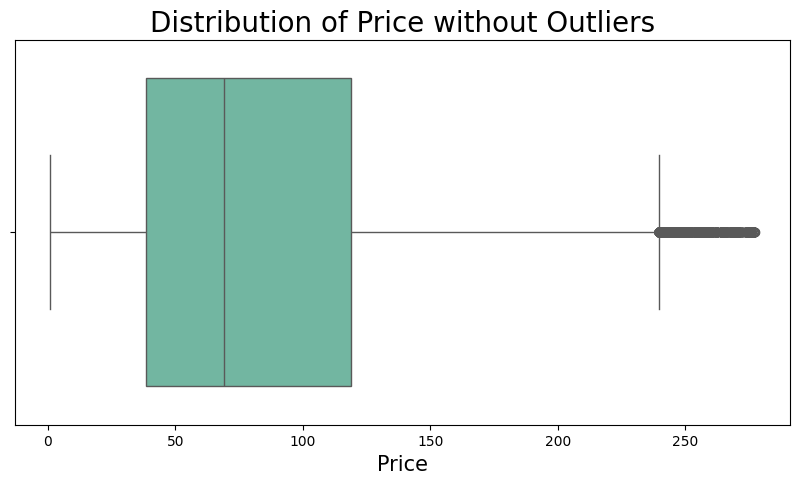

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='price', data=priceDistribution)
plt.xlabel('Price',color='black',fontsize=15)
plt.title('Distribution of Price without Outliers',color='black',fontsize=20)
plt.show()

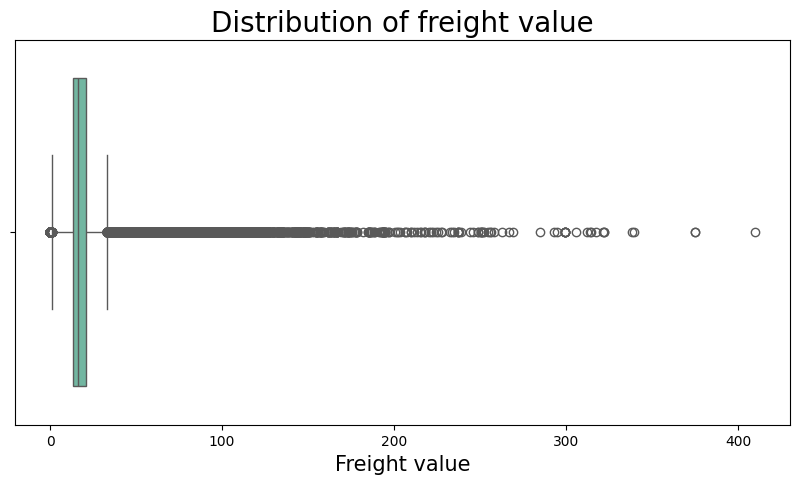

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='freight_value', data=orderItems)
plt.xlabel('Freight value',color='black',fontsize=15)
plt.title('Distribution of freight value',color='black',fontsize=20)
plt.show()

In [36]:
Q1 = np.quantile(orderItems.freight_value, 0.25)
Q3 = np.quantile(orderItems.freight_value, 0.75)
IQR = Q3 - Q1
freightValueDistribution = orderItems[~((orderItems.freight_value < Q1 - 1.5 * IQR) | (orderItems.freight_value > Q3 + 1.5 * IQR))]
freightValueDistribution.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


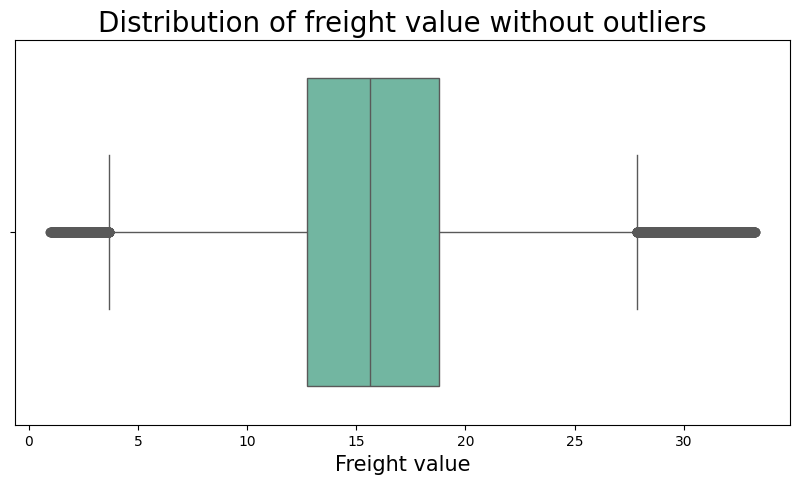

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='freight_value', data=freightValueDistribution)
plt.xlabel('Freight value',color='black',fontsize=15)
plt.title('Distribution of freight value without outliers',color='black',fontsize=20)
plt.show()

### Observation: 

# 4.4. Exploratory Data Analysis on Products DataFrame

In [38]:
# Output the first 10 rows
products.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [39]:
# Discover data shape
print("Number of Record: " + str((products.shape[0])))
print("Number of Columns: " + str((products.shape[1])))

Number of Record: 32951
Number of Columns: 9


In [40]:
# Data type
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [41]:
# Finding missing value
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [42]:
# Drop null value
products.dropna(inplace = True)

In [43]:
# Creating a table containing neccessary products information
orderedProducts = products.merge(orderItems, on = 'product_id').merge(productCategoryTranslation, on = 'product_category_name')[['product_id', 'product_category_name_english', 'order_id', 'price', 'freight_value']]

# Creating a column 'total_revenue' equal to the sum of price and freight_value
orderedProducts['total_revenue'] = orderedProducts.price + orderedProducts.freight_value
orderedProducts.head()

,product_id,product_category_name_english,order_id,price,freight_value,total_revenue
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,10.91,7.39,18.30
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,048cc42e03ca8d43c729adf6962cb348,16.90,7.78,24.68
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,5fa78e91b5cb84b6a8ccc42733f95742,16.90,7.78,24.68
3,0d009643171aee696f4733340bc2fdd0,perfumery,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,339.00,17.13,356.13
4,0d009643171aee696f4733340bc2fdd0,perfumery,7b13c77c64a9a956500cbf1a9a23798d,275.00,23.48,298.48


In [44]:
orderedProductsAnalysis = orderedProducts.groupby('product_category_name_english', as_index = False).agg({'product_id': 'count','order_id' : 'count', 'total_revenue': 'sum'})
orderedProductsAnalysis.head()

,product_category_name_english,product_id,order_id,total_revenue
0,agro_industry_and_commerce,212,212,78374.07
1,air_conditioning,297,297,61774.19
2,art,209,209,28247.81
3,arts_and_craftmanship,24,24,2184.14
4,audio,364,364,56398.94


In [45]:
top10revenueGenerating = orderedProductsAnalysis.sort_values(by = 'total_revenue', ascending = False)[:10]
top10revenueGenerating

,product_category_name_english,product_id,order_id,total_revenue
43,health_beauty,9670,9670,1441248.07
70,watches_gifts,5991,5991,1305541.61
7,bed_bath_table,11115,11115,1241681.72
65,sports_leisure,8641,8641,1156656.48
15,computers_accessories,7827,7827,1059272.40
39,furniture_decor,8334,8334,902511.79
49,housewares,6964,6964,778397.77
20,cool_stuff,3796,3796,719329.95
5,auto,4235,4235,685384.32
42,garden_tools,4347,4347,584219.21


In [46]:
top10NoOfOrdersGenerating = orderedProductsAnalysis.sort_values(by = 'order_id', ascending = False)[:10]
top10NoOfOrdersGenerating

,product_category_name_english,product_id,order_id,total_revenue
7,bed_bath_table,11115,11115,1241681.72
43,health_beauty,9670,9670,1441248.07
65,sports_leisure,8641,8641,1156656.48
39,furniture_decor,8334,8334,902511.79
15,computers_accessories,7827,7827,1059272.40
49,housewares,6964,6964,778397.77
70,watches_gifts,5991,5991,1305541.61
68,telephony,4545,4545,394883.32
42,garden_tools,4347,4347,584219.21
5,auto,4235,4235,685384.32


# 5. Create a Grouped-by Dataframe for Individual Customers for Further RFM Analysis

In [47]:
merged = customers.merge(orders, on = 'customer_id').merge(orderItems, on = 'order_id').merge(products, on = 'product_id').merge(payments, on = 'order_id').merge(orderReviews, on = 'order_id', how = 'left')
merged.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,997.0,6.0,1.0,10.0,8.0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,86255.0,12.0,5.0,20.0,18.0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,86255.0,12.0,5.0,20.0,18.0,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,7890.0,10.0,6.0,16.0,18.0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3.0,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,9819.0,14.0,9.0,21.0,25.0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4.0,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24
5,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,88460,angelina,SC,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-03-28 18:23:51,2017-04-11 10:16:56,2017-04-24,894.0,5.0,13.0,12.0,18.0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-04-05 15:25:11,126.99,15.06,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1,credit_card,5,142.05,1496c2a9c41a846ba946a98a09879660,4.0,NaN,NaN,2017-04-12 00:00:00,2017-04-15 15:34:45
6,fbd40c083aa8cddebb5265

In [48]:
merged.shape


(112439, 41)

In [49]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112439 entries, 0 to 112438
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112439 non-null  object        
 1   customer_unique_id             112439 non-null  object        
 2   customer_zip_code_prefix       112439 non-null  object        
 3   customer_city                  112439 non-null  object        
 4   customer_state                 112439 non-null  object        
 5   order_id                       112439 non-null  object        
 6   order_status                   112439 non-null  object        
 7   order_purchase_timestamp       112439 non-null  datetime64[ns]
 8   order_approved_at              112439 non-null  datetime64[ns]
 9   order_delivered_carrier_date   112439 non-null  datetime64[ns]
 10  order_delivered_customer_date  112439 non-null  datetime64[ns]
 11  

In [50]:
final = merged.groupby('customer_unique_id', as_index=False).agg({'order_id'                      : 'nunique',
                                                                  'purchased_approved'            : 'mean',
                                                                  'delivered_estimated'           : 'min',
                                                                  'purchased_delivered'           : 'mean',
                                                                  'product_id'                    : 'nunique',
                                                                  'price'                         : 'sum',
                                                                  'freight_value'                 : 'sum',
                                                                  'payment_type'                  : 'max',
                                                                  'payment_installments'          : 'max',
                                                                  'payment_value'                 : 'sum',
                                                                  'review_score'                  : 'mean'})

final.head()

,customer_unique_id,order_id,purchased_approved,delivered_estimated,purchased_delivered,product_id,price,freight_value,payment_type,payment_installments,payment_value,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,1,891.0,4.0,6.0,1,129.90,12.00,credit_card,8,141.90,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,26057.0,4.0,3.0,1,18.90,8.29,credit_card,1,27.19,4.0
2,0000f46a3911fa3c0805444483337064,1,0.0,1.0,25.0,1,69.00,17.22,credit_card,8,86.22,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1176.0,11.0,20.0,1,25.99,17.63,credit_card,4,43.62,4.0
4,0004aac84e0df4da2b147fca70cf8255,1,1270.0,7.0,13.0,1,180.00,16.89,credit_card,6,196.89,5.0


In [51]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90791 entries, 0 to 90790
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_unique_id    90791 non-null  object 
 1   order_id              90791 non-null  int64  
 2   purchased_approved    90779 non-null  float64
 3   delivered_estimated   90783 non-null  float64
 4   purchased_delivered   90783 non-null  float64
 5   product_id            90791 non-null  int64  
 6   price                 90791 non-null  float64
 7   freight_value         90791 non-null  float64
 8   payment_type          90791 non-null  object 
 9   payment_installments  90791 non-null  int64  
 10  payment_value         90791 non-null  float64
 11  review_score          90201 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 8.3+ MB


In [52]:
final.rename(columns = {'order_id' : 'no_of_orders', 'product_id' : 'no_of_products'}, inplace = True)

In [53]:
# Save the grouped-by dataframe as a new csv for future usage.
final.to_csv('final.csv')
merged.to_csv('merged.csv')

# 6. RMF Analysis

## 6.1. Create DataFrame for RFM Analysis 

### Recency

In [54]:
# Create a recency table for RMF analysis
recency = merged.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recency.rename(columns={'order_purchase_timestamp':'LastPurchaseDate'},inplace = True)
recency.head()

,customer_unique_id,LastPurchaseDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [55]:
# We calculate the recency by subtracting the lastRecentDate of the database by the lastPurchaseDate

In [56]:
recent_date = merged['order_purchase_timestamp'].dt.date.max()
recency['Recency'] = recency['LastPurchaseDate'].dt.date.apply(lambda x: (recent_date - x).days)
recency.head()

,customer_unique_id,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,114
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288


### Frequency

In [57]:
frequency = merged.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
frequency.rename(columns={'order_id':'Frequency'},inplace=True)
frequency.head()

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


### Monetary

In [58]:
monetary = merged.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary.rename(columns={'payment_value':'Monetary'},inplace=True)
monetary.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


### Merging to create RFM dataframe 

In [59]:
rfm = recency.merge(frequency, on='customer_unique_id').merge(monetary, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


**Observation**: 
For the convenience of our analysis, customers buy in the last days of the dataframe will have the value of Recency equal to 1 instead of 0

In [60]:
rfm['Recency'] = rfm.Recency.apply(lambda x: 1 if x == 0 else x)

## 6.2. RFM Analysis

<Figure size 1000x500 with 0 Axes>

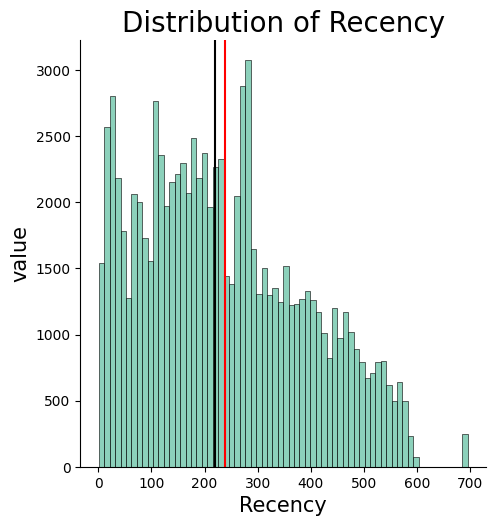

Mean of recency:  238.67790860327565
Median of recency:  220.0
Skewness of recency:  0.4357471943855413


In [61]:
# Plot the distribution of recency
plt.figure(figsize = (10, 5))
sns.displot(rfm.Recency)
plt.axvline(rfm.Recency.mean(), c = 'red')
plt.axvline(rfm.Recency.median(), c = 'black')
plt.title('Distribution of Recency',fontsize=20)
plt.xlabel('Recency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of recency: ', rfm.Recency.mean())
print('Median of recency: ', rfm.Recency.median())
print('Skewness of recency: ', rfm.Recency.skew())

<Figure size 1000x500 with 0 Axes>

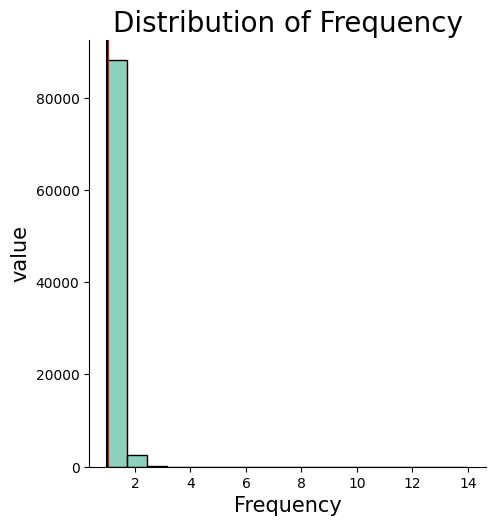

Mean of frequency:  1.0329107510656343
Median of frequency:  1.0
Skewness of frequency:  10.662315056046596


In [62]:
# Plot the distribution of Frequency
plt.figure(figsize = (10, 5))
sns.displot(rfm.Frequency)
plt.axvline(rfm.Frequency.mean(), c = 'red')
plt.axvline(rfm.Frequency.median(), c = 'black')
plt.title('Distribution of Frequency',fontsize=20)
plt.xlabel('Frequency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of frequency: ', rfm.Frequency.mean())
print('Median of frequency: ', rfm.Frequency.median())
print('Skewness of frequency: ', rfm.Frequency.skew())

### Treating outliers using IQR 

In [63]:
Q1 = np.quantile(rfm.Frequency, 0.25)
Q3 = np.quantile(rfm.Frequency, 0.75)
IQR = Q3 - Q1
frequencyDistribution = rfm[~((rfm.Frequency < Q1 - 1.5 * IQR) | (rfm.Frequency > Q3 + 1.5 * IQR))]
frequencyDistribution.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


<Figure size 1000x500 with 0 Axes>

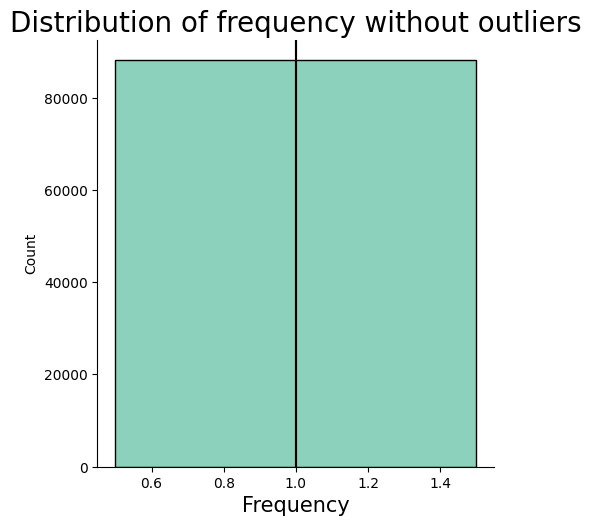

In [64]:
plt.figure(figsize=(10, 5))
sns.displot(frequencyDistribution.Frequency)
plt.axvline(frequencyDistribution.Frequency.mean(), c = 'red')
plt.axvline(frequencyDistribution.Frequency.median(), c = 'black')
plt.xlabel('Frequency',color='black',fontsize=15)
plt.title('Distribution of frequency without outliers',color='black',fontsize=20)
plt.show()

In [65]:
frequencyDistribution.Frequency.describe()

count    88104.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Frequency, dtype: float64

**Observations:** The frequency from RFM analysis without outliers has a standard deviation of 0, or all the values are only 1. So the frequency will not help in customers segmentation.

<Figure size 1000x500 with 0 Axes>

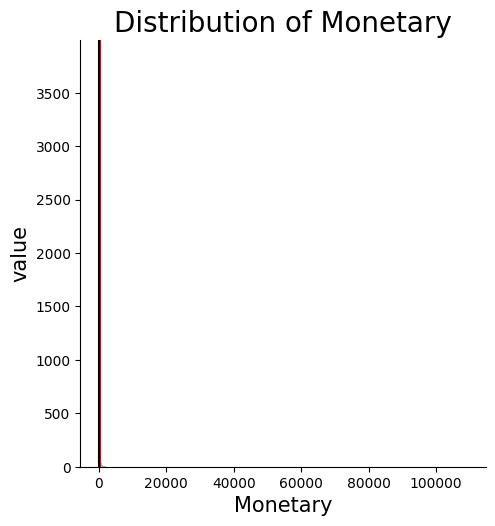

Mean of monetary:  213.36928759458536
Median of monetary:  112.96
Skewness of monetary:  69.46275731791886


In [66]:
plt.figure(figsize = (10, 5))
sns.displot(rfm.Monetary)
plt.axvline(rfm.Monetary.mean(), c = 'red')
plt.axvline(rfm.Monetary.median(), c = 'black')
plt.title('Distribution of Monetary',fontsize=20)
plt.xlabel('Monetary',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of monetary: ', rfm.Monetary.mean())
print('Median of monetary: ', rfm.Monetary.median())
print('Skewness of monetary: ', rfm.Monetary.skew())

### Treating outliers using IQR 

In [67]:
Q1 = np.quantile(rfm.Monetary, 0.25)
Q3 = np.quantile(rfm.Monetary, 0.75)
IQR = Q3 - Q1
monetaryDistribution = rfm[~((rfm.Monetary < Q1 - 1.5 * IQR) | (rfm.Monetary > Q3 + 1.5 * IQR))]
monetaryDistribution.head()


,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


<Figure size 1000x500 with 0 Axes>

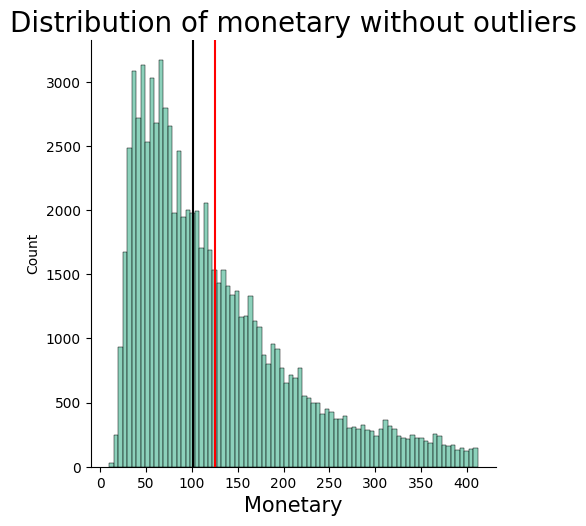

In [68]:
plt.figure(figsize=(10, 5))
sns.displot(monetaryDistribution.Monetary)
plt.axvline(monetaryDistribution.Monetary.mean(), c = 'red')
plt.axvline(monetaryDistribution.Monetary.median(), c = 'black')
plt.xlabel('Monetary',color='black',fontsize=15)
plt.title('Distribution of monetary without outliers',color='black',fontsize=20)
plt.show()

## 6.3. Customer Segmentation Using RFM 

### Label for recency 

In [69]:
# Assign values for lower limit recency, middle recency and upper limit recency 
ll_r = rfm.Recency.quantile(0.25)
mid_r = rfm.Recency.quantile(0.50)
ul_r = rfm.Recency.quantile(0.75)
print(ll_r, mid_r, ul_r)

115.0 220.0 347.0


In [70]:
# Define function to categorize recency lever:
def recency_label(recent):
    if recent <= ll_r:
        return 1
    elif (recent > ll_r) and (recent <= mid_r):
        return 2
    elif (recent > mid_r) and (recent <= ul_r):
        return 3
    elif recent > ul_r:
        return 4

In [71]:
# Apply the function reccency_label for the rfm dataframe
rfm['recency_label'] = rfm.Recency.apply(recency_label)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,recency_label
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1
2,0000f46a3911fa3c0805444483337064,537,1,86.22,4
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,3


In [72]:
rfm.recency_label.value_counts()

recency_label
1    22830
2    22657
4    22656
3    22648
Name: count, dtype: int64

* 1 - Customers who whose visit date(s) are the most recent. (Recency value within the 25% quantile)
* 2 - Customers who whose visit date(s) are not very recent. (Recency value between 25% and 50% quantile)
* 3 - Customers who whose visit date(s) are somewhat recent. (Recency value between 50% and 75% quantile)
* 4 - Customers who whose visit date(s) are the oldest. (Recency value more than 75% quantile)

### Label for Frequency

In [73]:
rfm.Frequency.value_counts()

Frequency
1     88104
2      2470
3       172
4        28
5         9
6         3
7         3
9         1
14        1
Name: count, dtype: int64

In [74]:
# Define function to assign frequency value to customer
def frequency_label(frequent):
    if frequent == 1:
        return 4
    elif frequent == 2:
        return 3
    elif frequent == 3:
        return 2
    elif frequent > 3:
        return 1

# Apply the function
rfm['frequency_label'] = rfm.Frequency.apply(frequency_label)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,recency_label,frequency_label
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,4
2,0000f46a3911fa3c0805444483337064,537,1,86.22,4,4
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,4
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,3,4


In [75]:
rfm.frequency_label.value_counts()

frequency_label
4    88104
3     2470
2      172
1       45
Name: count, dtype: int64

* 1 - Most frequent customers. (Frequency > 3)
* 2 - Frequent frequent customers. (Frequency = 3)
* 3 - Somewhat frequent customers. (Frequency = 2)
* 4 - Least frequent customers. (Frequency = 1)

### Label for monetary

In [76]:
# Assign values for lower limit monetary, middle monetary and upper limit monetary 
ll_m = rfm.Monetary.quantile(0.25)
mid_m = rfm.Monetary.quantile(0.50)
ul_m = rfm.Monetary.quantile(0.75)
print(ll_m, mid_m, ul_m)

63.85 112.96 203.085


In [77]:
# Define function to assign monetary value to customer
def monetary_label(money):
    if money <= ll_m:
        return 4
    elif (money > ll_m) and (money <= mid_m):
        return 3
    elif (money > mid_m) and (money <= ul_m):
        return 2
    elif money > ul_m:
        return 1

# Apply the function
rfm['monetary_label'] = rfm.Monetary.apply(monetary_label)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,recency_label,frequency_label,monetary_label
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,4,4
2,0000f46a3911fa3c0805444483337064,537,1,86.22,4,4,3
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,4,4
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,3,4,2


* 1 - Customers who spend large amount. (Monetary value within the 25% quantile)
* 2 - Customers who spend good amount. (Monetary value between 25% and 50% quantile)
* 3 - Customers who spend moderately. (Monetary value between 50% and 75% quantile)
* 4 - Customers who spend the least. (Monetary value more than 75% quantile)

### Assign rank to the customer


Since **most of the frequency class is 4**, we will use only recency and monetary for customer segmentation.

In [78]:
rfm['rank_rm'] = list(zip(rfm.recency_label, rfm.monetary_label))
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,recency_label,frequency_label,monetary_label,rank_rm
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,2,"(1, 2)"
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,4,4,"(1, 4)"
2,0000f46a3911fa3c0805444483337064,537,1,86.22,4,4,3,"(4, 3)"
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,4,4,"(3, 4)"
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,3,4,2,"(3, 2)"


In [79]:
rfm.rank_rm.value_counts()

rank_rm
(1, 2)    5908
(3, 3)    5862
(4, 3)    5839
(1, 1)    5783
(2, 4)    5759
(4, 4)    5733
(2, 2)    5715
(3, 1)    5697
(2, 1)    5662
(1, 4)    5661
(4, 1)    5556
(3, 4)    5545
(3, 2)    5544
(4, 2)    5528
(2, 3)    5521
(1, 3)    5478
Name: count, dtype: int64

The most important ranks:
* (Recency - 1, Monetary - 1) - They are very recent and have spend a lot of money
* (Recency - 1, Monetary - 2) - They are very recent and have spend a good amount of money
* (Recency - 2, Monetary - 1) - They are recent and have spend a lot of money
* (Recency - 2, Monetary - 2) - They are recent and have spend a good of money
* (Recency - 1, Monetary - 3) - They are very recent and have spend a decent of money
The least important ranks:
* (Recency - 4, Monetary - 4) - They are not at all recent and spend a negligible amount of money
* (Recency - 4, Monetary - 3) - They are not at all recent and spend a a decent amount of money
* (Recency - 4, Monetary - 2) - They are not at all recent and spend a good amount of money
* (Recency - 3, Monetary - 4) - They are not very recent and spend a negligible amount of money
* (Recency - 3, Monetary - 3) - They are not very recent and spend a decent amount of money

### Define Churn using the mean of Recency

In [80]:
rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > rfm.Recency.mean() else 0)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,recency_label,frequency_label,monetary_label,rank_rm,Churn
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,2,"(1, 2)",0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,4,4,"(1, 4)",0
2,0000f46a3911fa3c0805444483337064,537,1,86.22,4,4,3,"(4, 3)",1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,4,4,"(3, 4)",1
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,3,4,2,"(3, 2)",1


In [81]:
# Create a final dataframe for Churn prediction
final = final.merge(rfm[['customer_unique_id', 'Recency', 'Monetary', 'Frequency', 'Churn']], on = 'customer_unique_id')
final.head()

,customer_unique_id,no_of_orders,purchased_approved,delivered_estimated,purchased_delivered,no_of_products,price,freight_value,payment_type,payment_installments,payment_value,review_score,Recency,Monetary,Frequency,Churn
0,0000366f3b9a7992bf8c76cfdf3221e2,1,891.0,4.0,6.0,1,129.90,12.00,credit_card,8,141.90,5.0,111,141.90,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,26057.0,4.0,3.0,1,18.90,8.29,credit_card,1,27.19,4.0,114,27.19,1,0
2,0000f46a3911fa3c0805444483337064,1,0.0,1.0,25.0,1,69.00,17.22,credit_card,8,86.22,3.0,537,86.22,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,1176.0,11.0,20.0,1,25.99,17.63,credit_card,4,43.62,4.0,321,43.62,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,1270.0,7.0,13.0,1,180.00,16.89,credit_card,6,196.89,5.0,288,196.89,1,1


### Outlier treatment

Skewness of no_of_orders: 10.662315056046596
Standard deviation of no_of_orders: 0.20650460836205248


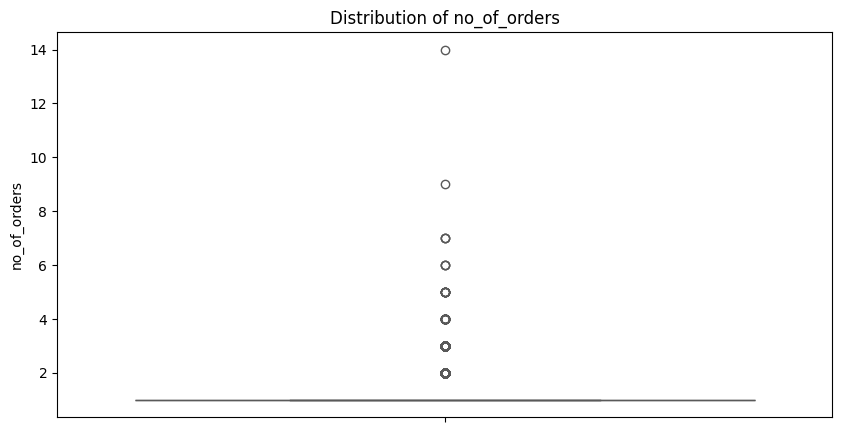

Skewness of purchased_approved: 1.6936309256835032
Standard deviation of purchased_approved: 23395.02920238397


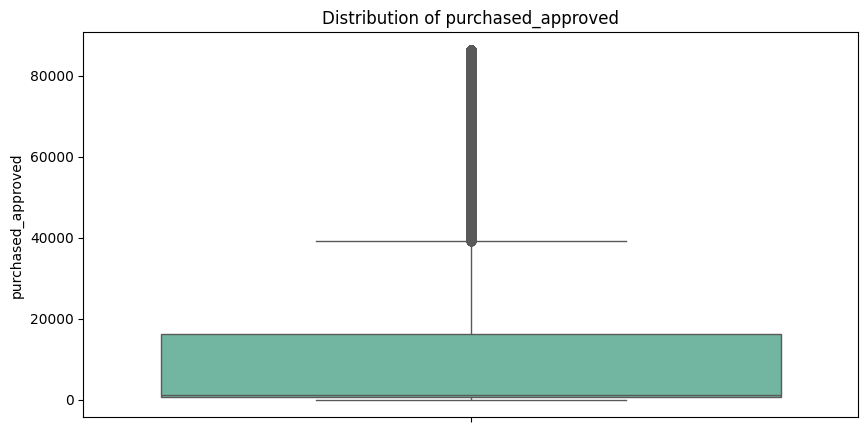

Skewness of delivered_estimated: -2.099513985099319
Standard deviation of delivered_estimated: 10.205159273838293


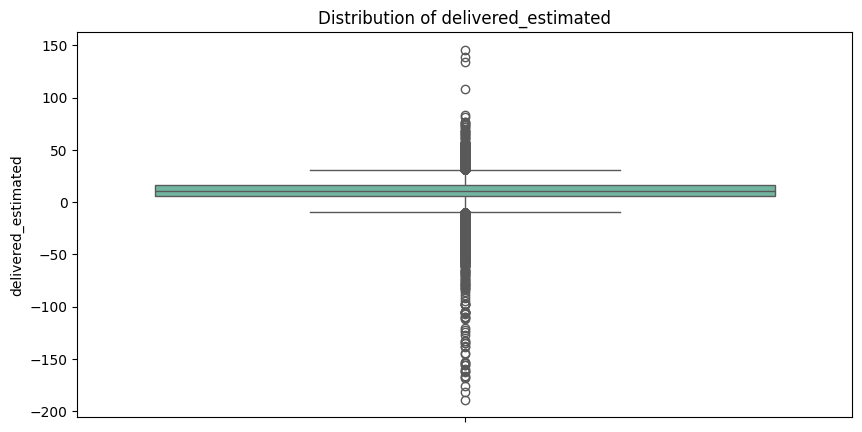

Skewness of purchased_delivered: 3.877992453092929
Standard deviation of purchased_delivered: 9.572502678727323


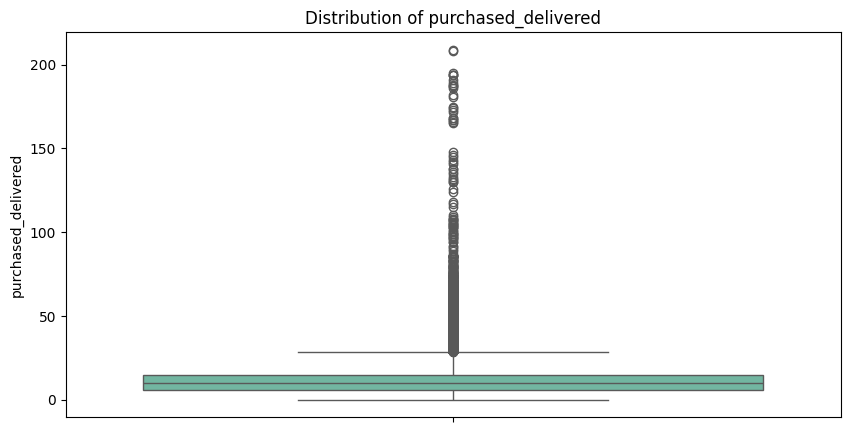

Skewness of no_of_products: 7.4099663885788996
Standard deviation of no_of_products: 0.3137370866449344


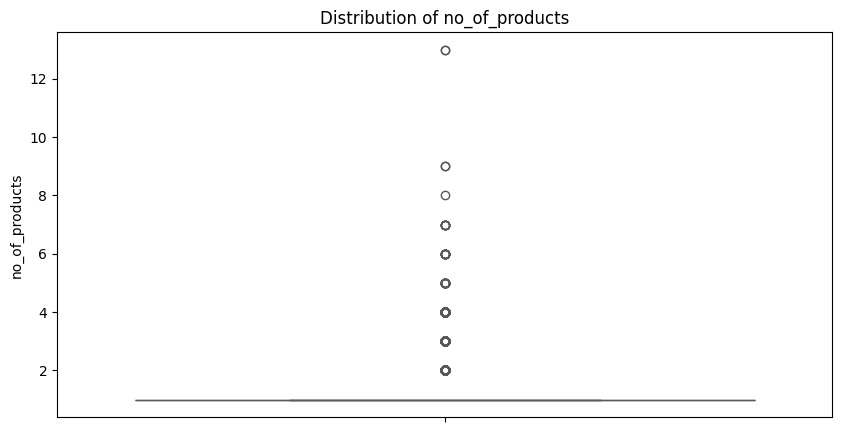

Skewness of price: 11.653190529594571
Standard deviation of price: 245.6110744249904


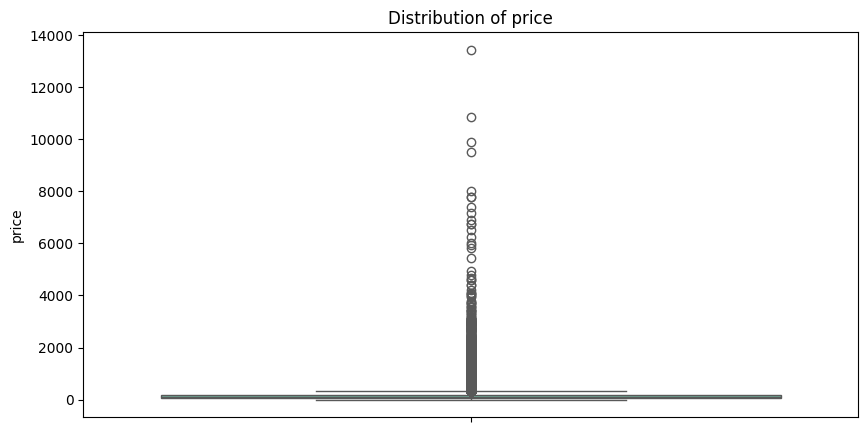

Skewness of freight_value: 13.387787616992195
Standard deviation of freight_value: 27.158449344242765


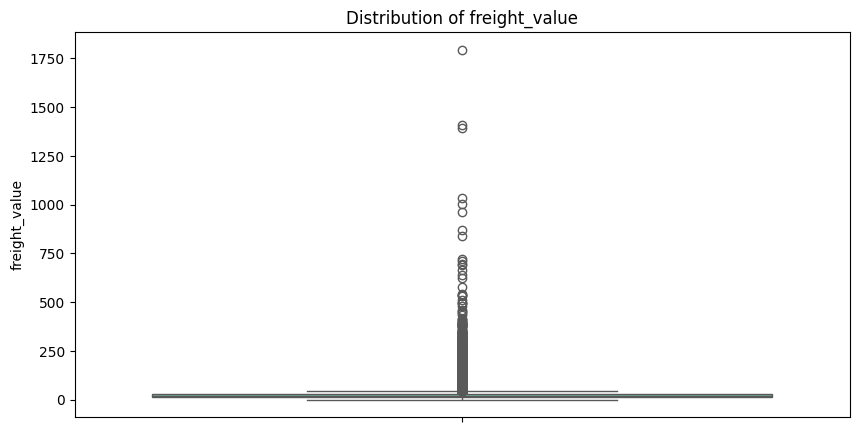

Skewness of payment_installments: 1.5979983917695235
Standard deviation of payment_installments: 2.7280422179987682


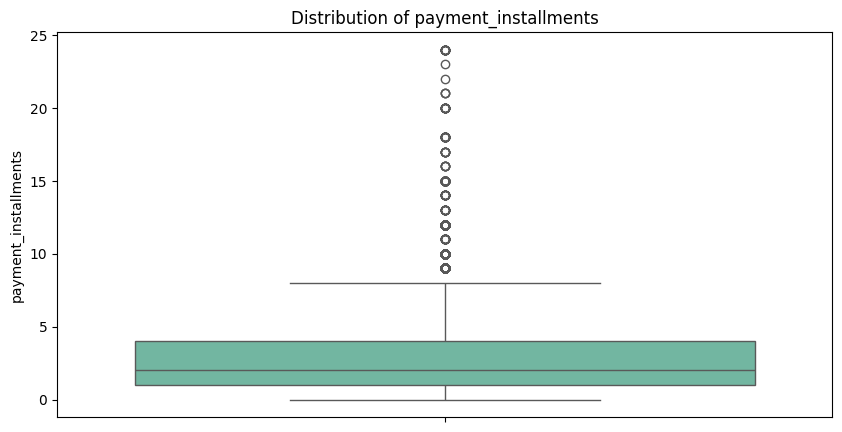

Skewness of payment_value: 69.46275731791886
Standard deviation of payment_value: 651.0266956965011


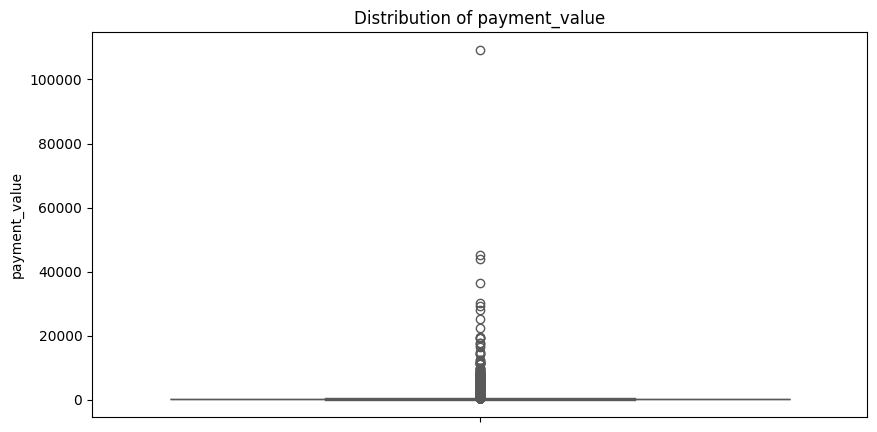

Skewness of review_score: -1.4754691674871072
Standard deviation of review_score: 1.2804824227559943


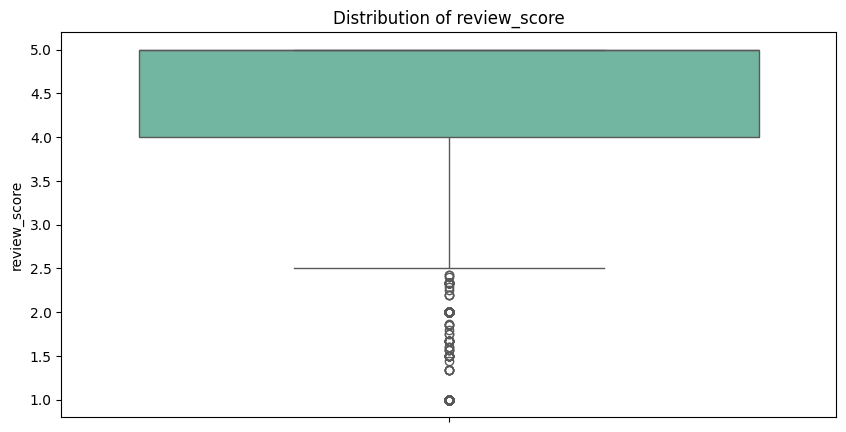

Skewness of Recency: 0.4357471943855413
Standard deviation of Recency: 152.37673283314223


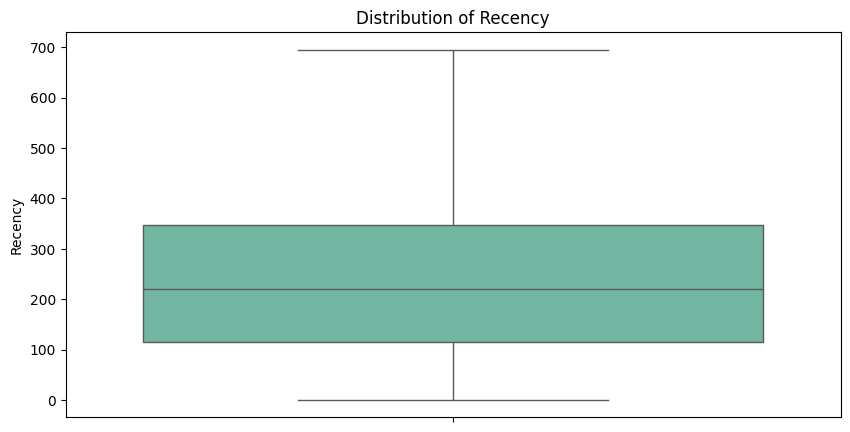

Skewness of Monetary: 69.46275731791886
Standard deviation of Monetary: 651.0266956965011


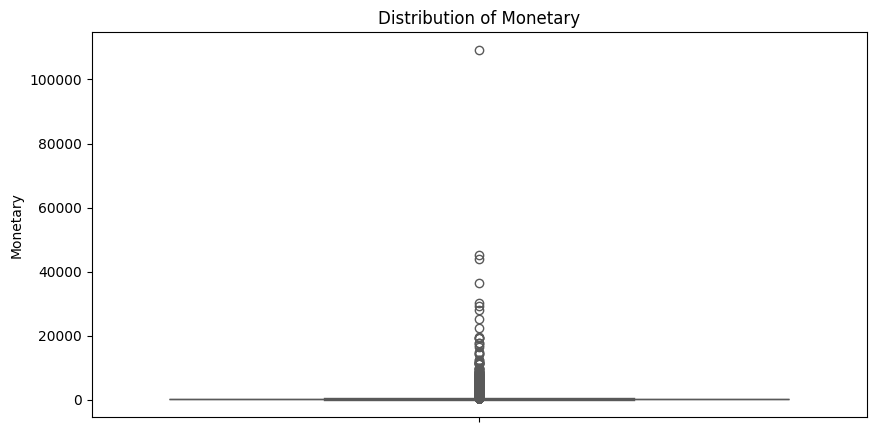

Skewness of Frequency: 10.662315056046596
Standard deviation of Frequency: 0.20650460836205248


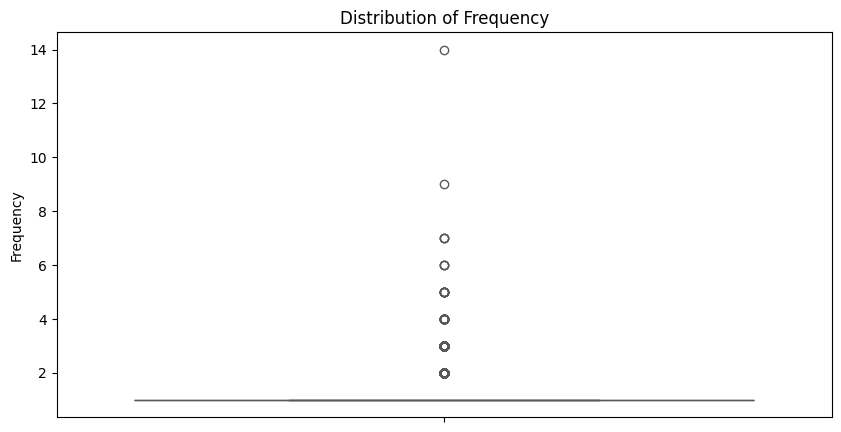

Skewness of Churn: 0.18488105345506864
Standard deviation of Churn: 0.4978800935810585


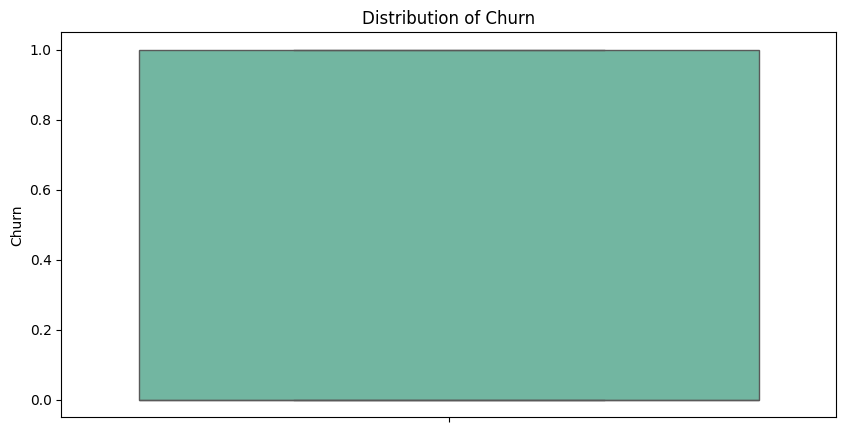

In [82]:
for col in final.select_dtypes(include = np.number).columns:
    plt.figure(figsize = (10, 5))
    print(f'Skewness of {col}: {final[col].skew()}')
    print(f'Standard deviation of {col}: {final[col].std()}')
    sns.boxplot(final[col])
    plt.title(f'Distribution of {col}')
    plt.show()

Since the columns **no_of_orders, no_of_products and Frequency has standard deviation almost equal to 0**, those columns are removed, as it would not add value to the model building.

In [83]:
final_outlierTreated = final.copy()

# Use IQR method to filter ouliers
for i in final_outlierTreated.select_dtypes(include = np.number).columns:
    q1 = final_outlierTreated[i].quantile(0.25)
    q3 = final_outlierTreated[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    final_outlierTreated[i] = np.where(final_outlierTreated[i]>ul,ul,final_outlierTreated[i])
    final_outlierTreated[i] = np.where(final_outlierTreated[i]<ll,ll,final_outlierTreated[i])



Skewness of no_of_orders: 0.0
Standard deviation of no_of_orders: 0.0


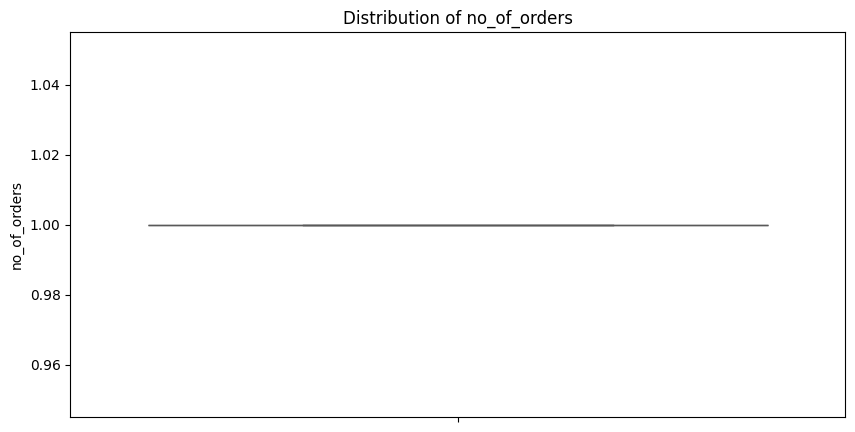

Skewness of purchased_approved: 1.216392182733474
Standard deviation of purchased_approved: 15171.970332958512


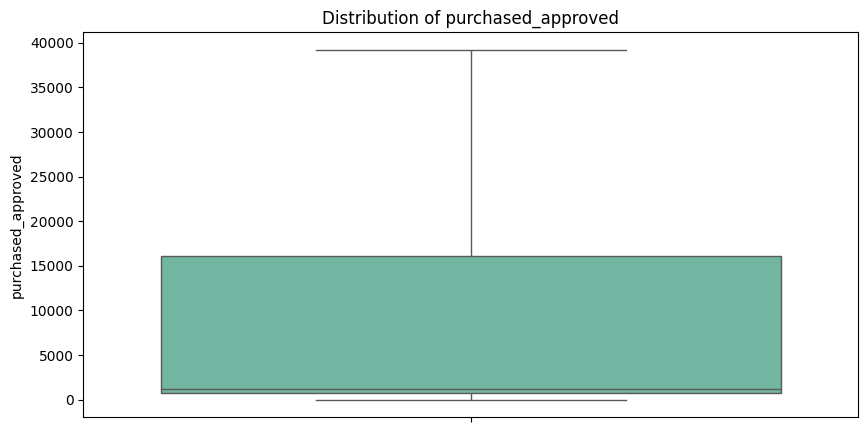

Skewness of delivered_estimated: -0.09875225492416805
Standard deviation of delivered_estimated: 8.274548075577137


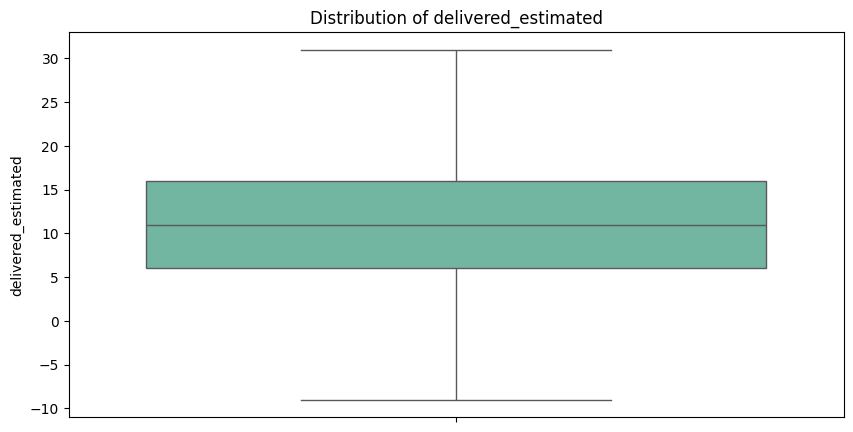

Skewness of purchased_delivered: 0.8744043781137524
Standard deviation of purchased_delivered: 7.116973585405031


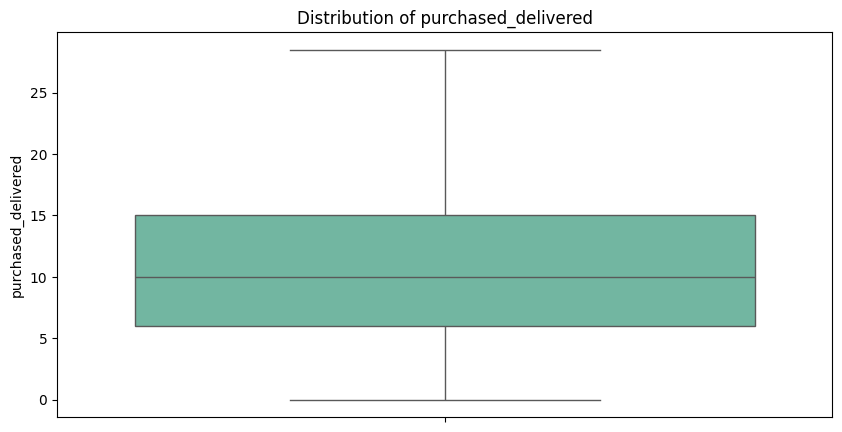

Skewness of no_of_products: 0.0
Standard deviation of no_of_products: 0.0


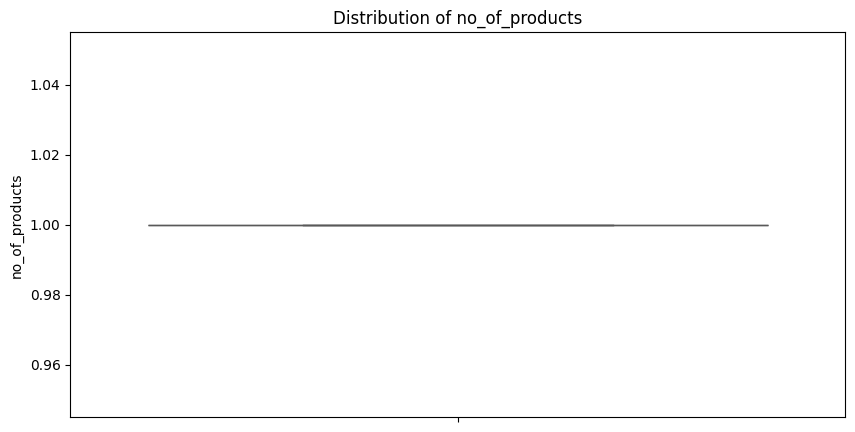

Skewness of price: 1.0573535022208354
Standard deviation of price: 92.38035696482959


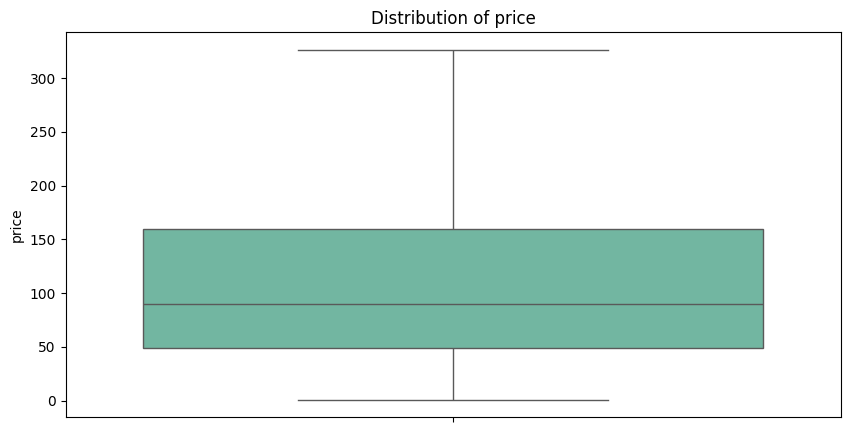

Skewness of freight_value: 0.9883246708219544
Standard deviation of freight_value: 11.175982630336641


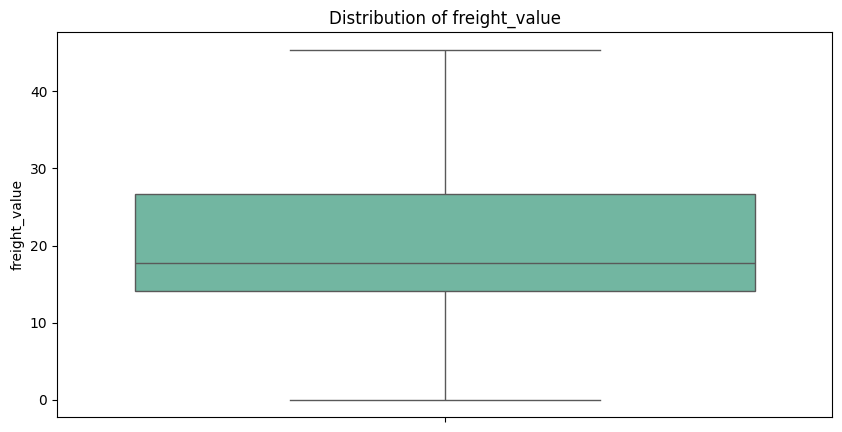

Skewness of payment_installments: 1.2117434227543398
Standard deviation of payment_installments: 2.439564559562109


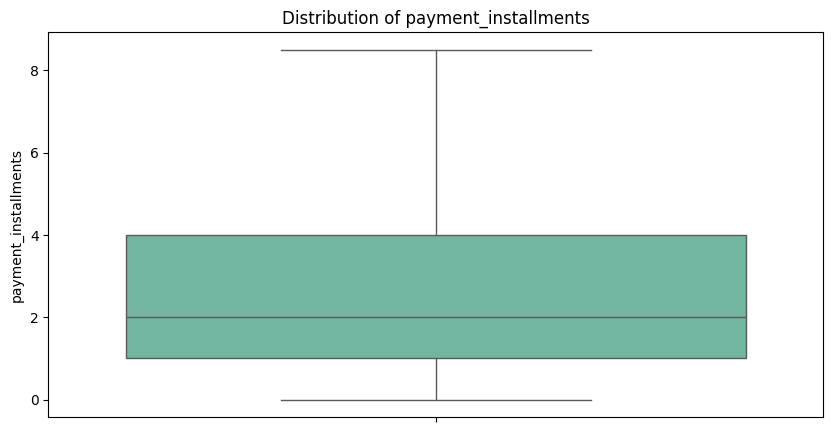

Skewness of payment_value: 1.09561707499389
Standard deviation of payment_value: 117.80250708638613


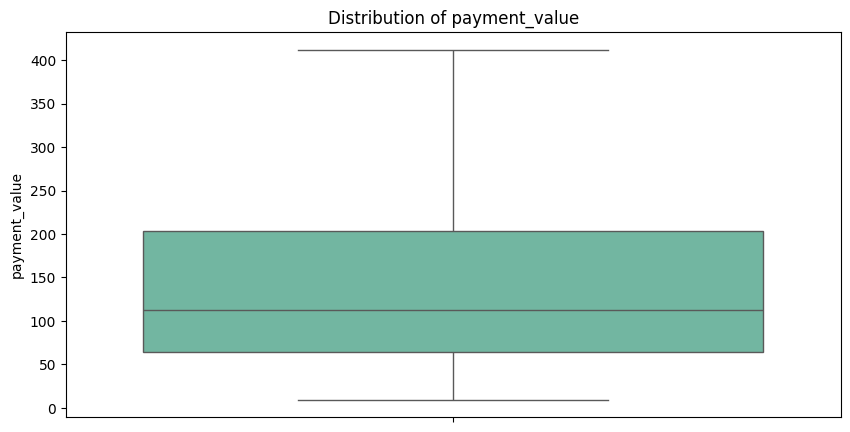

Skewness of review_score: -0.958082585213978
Standard deviation of review_score: 0.9284489358550768


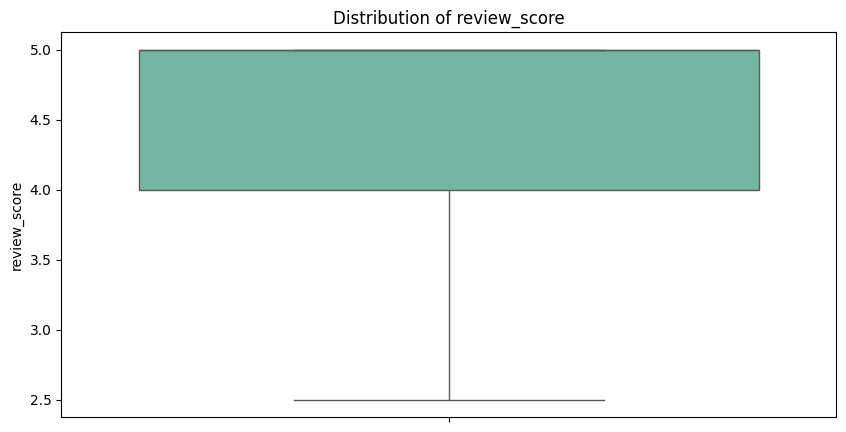

Skewness of Recency: 0.4357471943855413
Standard deviation of Recency: 152.37673283314223


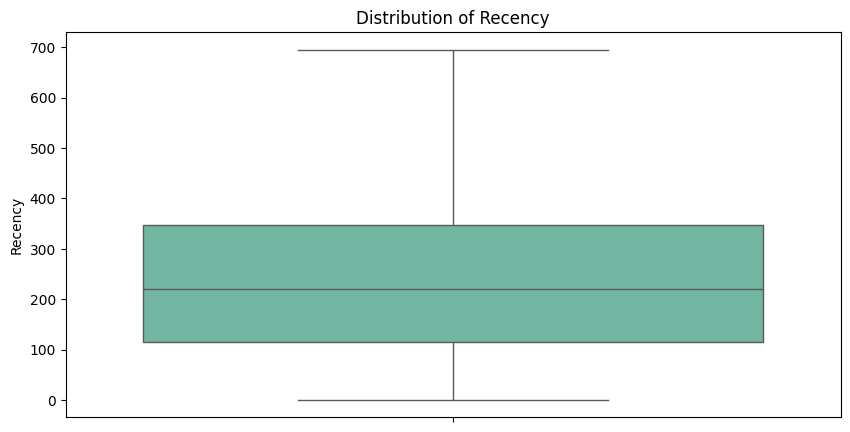

Skewness of Monetary: 1.09561707499389
Standard deviation of Monetary: 117.80250708638613


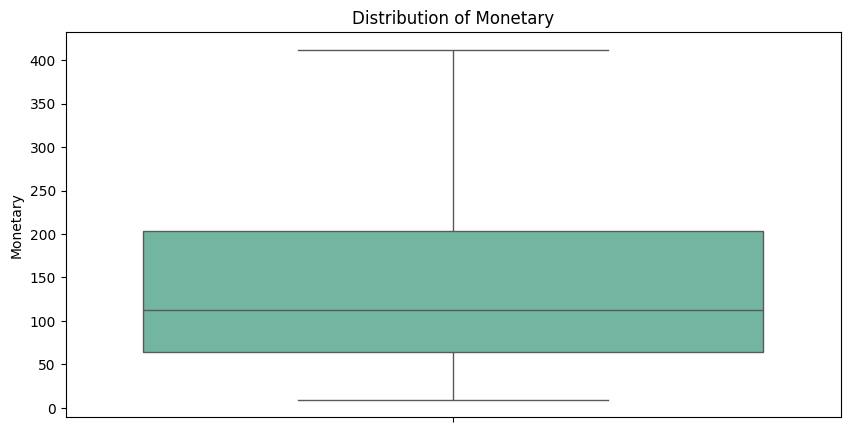

Skewness of Frequency: 0.0
Standard deviation of Frequency: 0.0


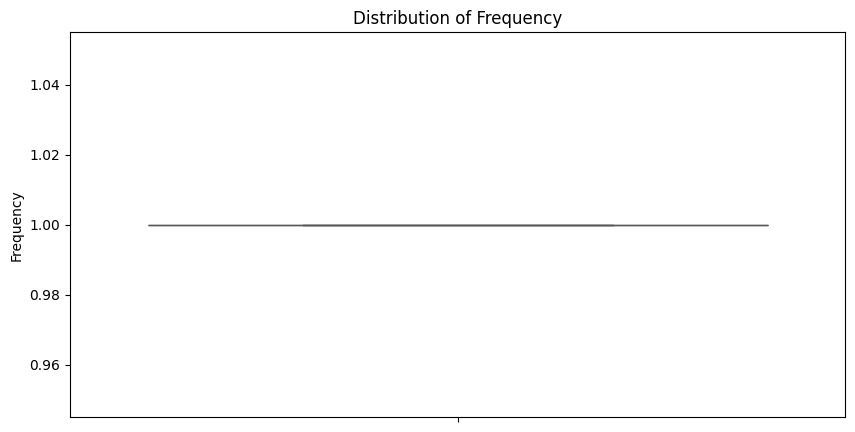

Skewness of Churn: 0.18488105345506864
Standard deviation of Churn: 0.4978800935810585


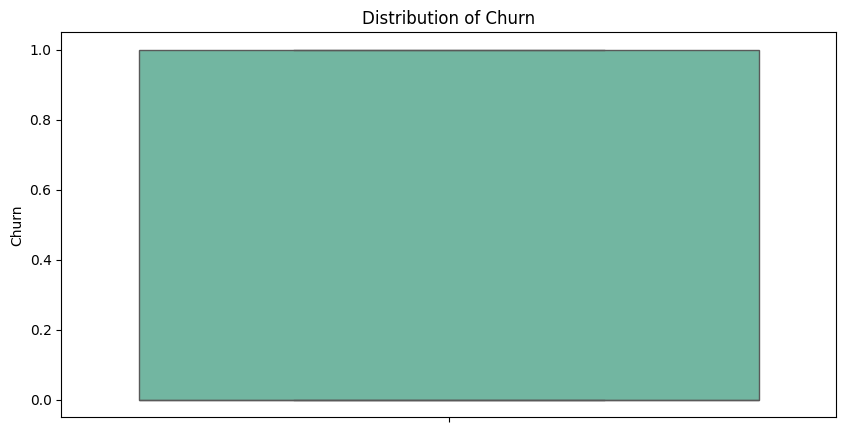

In [84]:
# Plot the Distribution of attributes
for col in final_outlierTreated.select_dtypes(include = np.number).columns:
    plt.figure(figsize = (10, 5))
    print(f'Skewness of {col}: {final_outlierTreated[col].skew()}')
    print(f'Standard deviation of {col}: {final_outlierTreated[col].std()}')
    sns.boxplot(final_outlierTreated[col])
    plt.title(f'Distribution of {col}')
    plt.show()

### Missing value treatment

In [85]:
# Find missing values
final_outlierTreated.isna().sum() / len(final) * 100

customer_unique_id      0.000000
no_of_orders            0.000000
purchased_approved      0.013217
delivered_estimated     0.008811
purchased_delivered     0.008811
no_of_products          0.000000
price                   0.000000
freight_value           0.000000
payment_type            0.000000
payment_installments    0.000000
payment_value           0.000000
review_score            0.649844
Recency                 0.000000
Monetary                0.000000
Frequency               0.000000
Churn                   0.000000
dtype: float64

In [86]:
# Drop unused column for prediction
# final_outlierTreated.drop(columns = ['review_score', 'no_of_orders', 'no_of_products', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm''customer_zip_code_prefix', 'customer_city', 'customer_state'], axis = 1, inplace = True)

KeyError: "['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cmcustomer_zip_code_prefix', 'customer_city', 'customer_state'] not found in axis"

# 7. Churn Prediction

### Check for target imbalance


In [87]:
final_outlierTreated.Churn.value_counts(normalize = True) * 100

Churn
0.0    54.602328
1.0    45.397672
Name: proportion, dtype: float64

 **Observation**: There is no target imbalance

## 7.1. Naive Bayes 

In [88]:
# Split data into train and test samples
final_outlierTreated.dropna(axis = 0, inplace = True)

X = final_outlierTreated[['purchased_approved', 'delivered_estimated', 'purchased_delivered', 'price', 'freight_value',  'Frequency', 'Monetary']]
y = final_outlierTreated["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [89]:
# Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(X_test)

In [90]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.588
Precision: 0.563
Recall: 0.397
F1 Score: 0.466


### Retrain the model

In [91]:
# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train = scaler.transform(X_train)

# Scale the test data
X_test = scaler.transform(X_test)

In [92]:
# Fit the model
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train, y_train)

# Get the predictions on test data
scaled_preds = gnb_scaled.predict(X_test)

In [93]:
# Create a dataframe containing Model and Performance
models = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
models.loc[0]=['Naive Bayes','%.3f' % accuracy_score(y_test, scaled_preds), '%.3f' % precision_score(y_test,scaled_preds), '%.3f' % recall_score(y_test, scaled_preds), '%.3f' % f1_score(y_test, scaled_preds)]

## 7.2. Decision Tree 

In [94]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree.fit(X_train, y_train)

# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

In [95]:
# Drop unused column
churn_df = final_outlierTreated.drop(['customer_unique_id'], axis = 1)

# Dummy encode categorical variables
churn_df = pd.get_dummies(churn_df, drop_first=True)

In [96]:
# Define the y (target) variable
y = churn_df['Churn']

# Define the X (predictor) variables
X = churn_df.copy()
X = X.drop(['Churn', 'Recency'], axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, stratify=y, 
                                                    random_state=42)

In [97]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree.fit(X_train, y_train)

# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

In [98]:
# Generate performance metrics
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))

Accuracy: 0.652
Precision: 0.617
Recall: 0.614
F1 Score: 0.616


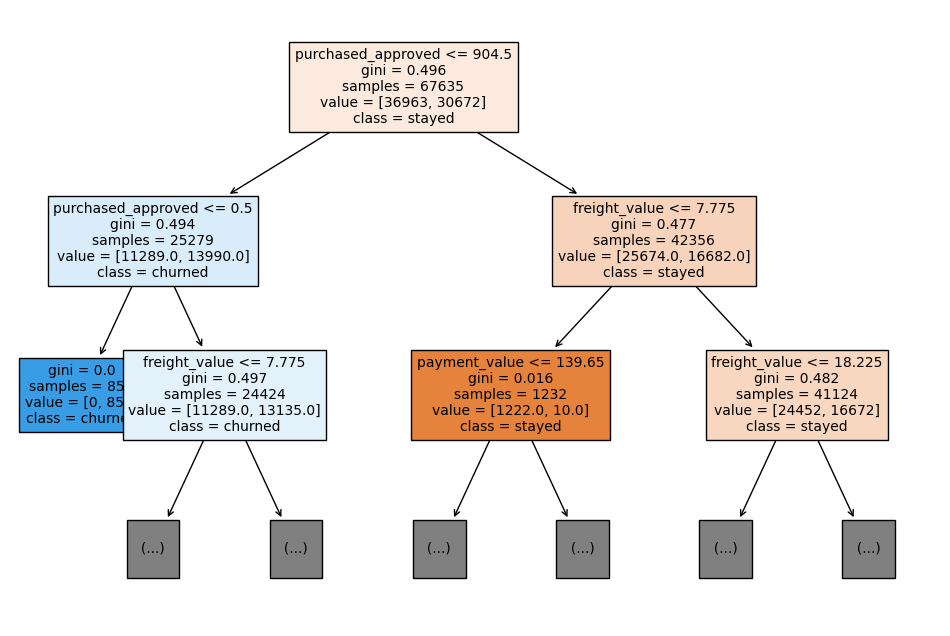

In [99]:
# Plot the tree
plt.figure(figsize=(12,8))
plot_tree(decision_tree, max_depth=2, fontsize=10, feature_names=X.columns, 
          class_names={0:'stayed', 1:'churned'}, filled=True);
plt.show()

### Tuning the model

In [100]:
# Assign a dictionary of hyperparameters to search over
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50]}

In [101]:
# Instantiate the classifier
tuned_decision_tree = DecisionTreeClassifier(random_state = 42)

In [102]:
scoring = ['accuracy', 'f1', 'precision', 'recall']  # Create a list of metrics
clf = GridSearchCV(tuned_decision_tree, tree_para, scoring=scoring, cv=5, refit="f1")

# Fit the model (same for both options)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50]},
             refit='f1', scoring=['accuracy', 'f1', 'precision', 'recall'])

In [103]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

In [104]:
# Get all the results from the CV and put them in a df
cv_results = pd.DataFrame(clf.cv_results_)

## Isolate the row of the df with the max(mean f1 score)
best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

# Extract accuracy, precision, recall, and f1 score from that row
f1 = best_estimator_results.mean_test_f1
recall = best_estimator_results.mean_test_recall
precision = best_estimator_results.mean_test_precision
accuracy = best_estimator_results.mean_test_accuracy

In [105]:
# Update model performance into Models dataframe
models.loc[1] = ['Tuned Decision Tree', f'{accuracy:.3f}', f'{precision:.3f}', f'{recall:.3f}', f'{f1:.3f}']
models

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.588,0.563,0.397,0.466
1,Tuned Decision Tree,0.672,0.634,0.656,0.644


## 7.3. Random Forest

In [106]:
# Separate into train, validate, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

In [107]:
# Determine set of hyperparameters.
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [108]:
# Create list of split indices
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [109]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

In [110]:
# Search over specified parameters.
rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

In [111]:
# Convert categorical variables into dummy/indicator variables (one-hot encoding)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)



# Ensure both X_train and X_test have the same columns after one-hot encoding by aligning the columns of X_train and X_test
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Fit the model
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [112]:
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [113]:
# Use optimal parameters on GridSearchCV.
rf_opt = RandomForestClassifier(n_estimators = 100, max_depth = 50, 
                                min_samples_leaf = 1, min_samples_split = 10,
                                max_features="sqrt", max_samples = 0.9, random_state = 0)

In [114]:
# Fit the optimal model.
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=10,
                       random_state=0)

In [115]:
y_pred = rf_opt.predict(X_test)

In [116]:
precision = precision_score(y_test, y_pred, pos_label = 0.0) # 0.0 equal to not_churn
recall = recall_score(y_test, y_pred, pos_label = 0.0)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label = 0.0)

In [117]:
# Update model performance into Models dataframe
models.loc[2] = ['Random Forest', f'{accuracy:.3f}', f'{precision:.3f}', f'{recall:.3f}', f'{f1:.3f}']
models

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.588,0.563,0.397,0.466
1,Tuned Decision Tree,0.672,0.634,0.656,0.644
2,Random Forest,0.707,0.723,0.750,0.736


## 7.4. XGBoost

In [118]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

# Determine set of hyperparameters
cv_params = {'max_depth': [4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]
             }    

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Search over specified parameters
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [119]:
# Fit the model
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [120]:
xgb_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': 8,
 'min_child_weight': 5,
 'n_estimators': 125}

In [126]:
#Update cv_params

cv_params = {'max_depth': [8], 
             'min_child_weight': [5],
             'learning_rate': [0.2],
             'n_estimators': [125]
             }    


xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [127]:
# Fit the optimal model
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.2], 'max_depth': [8],
                         'min_child_weight': [5], 'n_estimators': [125]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [128]:
y_pred = xgb_cv.predict(X_test)

In [129]:
# Calculate performance of model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# Update to models performance table
models.loc[3] = ['XGBoost', f'{accuracy:.3f}', f'{precision:.3f}', f'{recall:.3f}', f'{f1:.3f}']

models

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.588,0.563,0.397,0.466
1,Tuned Decision Tree,0.672,0.634,0.656,0.644
2,Random Forest,0.707,0.723,0.750,0.736
3,XGBoost,0.745,0.713,0.736,0.724


## Conclusion: 
**XGBoost** have the best performance with 0.745 accuracy